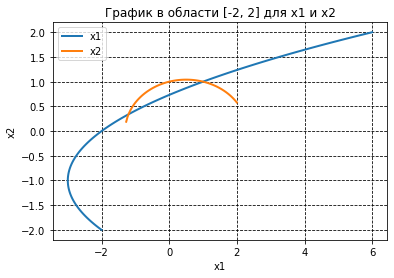

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def x_2(x):
    if (x-x**2+3)/3 >= 0 :
        return ((x-x**2+3)/3)**(1/2)
    else:
        return None

def x_1(x):
    return (1+x)**2 - 3

x = np.linspace(-2, 2, 100)

y_1 = np.array([x_1(i) for i in x])
y_2 = np.array([x_2(i) for i in x])

plt.plot(y_1, x, label="x1", linewidth=2)
plt.plot(x, y_2, label="x2", linewidth=2)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("График в области [-2, 2] для x1 и x2")

plt.grid(color = 'black', linestyle = '--')
plt.legend()
plt.show()

Найдём решение заключенное в области *0 < x<sub>1</sub> < 2* и *0 < x<sub>2</sub> < 1.5*  
Но для начала проверим достаточное условие сходимости (< 1)

### Метод простых итераций

In [47]:
def betta(x:list, x_prev:list) -> float:
    b = max([abs(x[i] - x_prev[i]) for i in range(len(x))])
    return b

#Проверка области G
def check_g(f):
    assert max(abs(np.sin(f[1]) / 4), abs(np.exp(f[0]) / 4)) < 1

#Метод простых итераций
def simple_iteration(X:list, eps:float = 0.0001):
    x_prev = X.copy() #Нулевая итерация
    print("0:", x_prev)
    x = [x_1(X[1]), x_2(X[0])] #Первая итерация
    iter = 1 #Счетчик для вывода
    print(f"{iter}:", np.round(x, 5))
    while betta(x, x_prev) > eps: #Проверка оценки погрешности
        x_prev = x.copy()
        x.clear()
        #Поиск новых коэффициентов при новой итерации
        x = [x_1(x_prev[1]), x_2(x_prev[0])]
        #check_g(x)

        iter += 1
        print(f"{iter}:", np.round(x, 5))  
    return x, iter

Возьмём точку O(x<sub>1</sub>, x<sub>2</sub>) с координатами длины отрезка x<sub>1</sub> и x<sub>2</sub>, поделённого на 2

In [48]:
X = [i/2 for i in [-2 + 0, 0 + 1]]
simple_iter, iter_s = simple_iteration(X)

0: [-1.0, 0.5]
1: [-0.75     0.57735]
2: [-0.51197  0.75   ]
3: [0.0625  0.86138]
4: [0.46473 1.00972]
5: [1.03897 1.04063]
6: [1.16419 0.99323]
7: [0.97296 0.96762]
8: [0.87152 1.00437]
9: [1.01752 1.01849]
10: [1.07431 0.99702]
11: [0.98811 0.98661]
12: [0.9466  1.00196]
13: [1.00783 1.00839]
14: [1.03363 0.99868]
15: [0.99474 0.99419]
16: [0.97679 1.00087]
17: [1.00349 1.00377]
18: [1.0151  0.99942]
19: [0.99767 0.99744]
20: [0.98978 1.00039]
21: [1.00155 1.00169]
22: [1.00674 0.99974]
23: [0.99896 0.99887]
24: [0.99547 1.00017]
25: [1.00069 1.00075]
26: [1.003   0.99988]
27: [0.99954 0.9995 ]
28: [0.99799 1.00008]
29: [1.00031 1.00033]
30: [1.00134 0.99995]
31: [0.9998  0.99978]
32: [0.99911 1.00003]
33: [1.00014 1.00015]
34: [1.00059 0.99998]
35: [0.99991 0.9999 ]
36: [0.9996  1.00002]
37: [1.00006 1.00007]
38: [1.00026 0.99999]
39: [0.99996 0.99996]
40: [0.99982 1.00001]
41: [1.00003 1.00003]
42: [1.00012 1.     ]


### Метод Зейделя

In [37]:
def method_seidel(X: list, eps:float = 0.0001):
    x_prev = X.copy() #Нулевая итерация
    print("0:", x_prev)
    iter = 1
    x = X.copy()
    while True:
        x_prev = x.copy()
        #Поиск первого коэффициента при новой итерации
        x[0] = x_1(x_prev[1])
        #Поиск второго коэффициента при новой итерации, используя уже найденный первый коэфф
        x[1] = x_2(x[0])
        #check_g(x)

        print(f"{iter}:", np.round(x, 5))
        if betta(x, x_prev) < eps: return x, iter
        iter += 1

        x_prev = x.copy()

In [42]:
X = [i/2 for i in [-2 + 0, 0 + 1.5]]
seidel, iter_seidel = method_seidel(X)

0: [-1.0, 0.75]
1: [0.0625  1.00972]
2: [1.03897 0.99323]
3: [0.97296 1.00437]
4: [1.01752 0.99702]
5: [0.98811 1.00196]
6: [1.00783 0.99868]
7: [0.99474 1.00087]
8: [1.00349 0.99942]
9: [0.99767 1.00039]
10: [1.00155 0.99974]
11: [0.99896 1.00017]
12: [1.00069 0.99988]
13: [0.99954 1.00008]
14: [1.00031 0.99995]
15: [0.9998  1.00003]
16: [1.00014 0.99998]
17: [0.99991 1.00002]
18: [1.00006 0.99999]
19: [0.99996 1.00001]
20: [1.00003 1.     ]


### Метод Ньютона

In [32]:
def w(x):
    return np.array([[6*x[0], -1+2*x[1]], [1, 1/(2*(x[1]+3)**(1/2))]])

def f(x):
    return np.array([(3*(x[0])**2 - x[1] + (x[1])**2 - 3), (x[0] - (x[1] + 3)**(1/2) + 1)]) * (-1)

def method_newton(X:list, eps:float = 0.0001):
    x = np.array(X.copy())
    print("0:", x)
    iter = 1
    while True:
        W = w(x)
        F = f(x)
        delta_x = np.linalg.solve(W, F)
        x += delta_x
        print(f"{iter}:", np.round(x, 5))
        if max(abs(delta_x)) < eps: return x, iter
        iter += 1


In [41]:
X = [i/2 for i in [0 + 2.2, 0 + 2.2]]
newton, iter_newton = method_newton(X)

0: [1.1 1.1]
1: [0.88466 1.66772]
2: [ 1.56303 -0.07164]
3: [ 0.98077 -0.99408]
4: [ 0.51761 -1.28104]
5: [ 0.3043  -1.26324]
6: [ 0.30333 -1.22495]
7: [ 0.32739 -1.21183]
8: [ 0.33532 -1.20672]
9: [ 0.33843 -1.20483]
10: [ 0.33958 -1.20413]
11: [ 0.34001 -1.20387]
12: [ 0.34016 -1.20378]
13: [ 0.34022 -1.20375]


In [34]:
from IPython.display import display, Markdown
display(Markdown(f"#### Метод простых итераций: x<sub>1</sub>={np.round(simple_iter[0], 5)}, x<sub>2</sub>={np.round(simple_iter[1], 5)}; Кол-во итераций: {iter_s}\n"
f"#### Метод Зейделя: x<sub>1</sub>={np.round(seidel[0], 5)}, x<sub>2</sub>={np.round(seidel[1], 5)}; Кол-во итераций: {iter_seidel}\n"
f"#### Метод Ньютона: x<sub>1</sub>={np.round(newton[0], 5)}, x<sub>2</sub>={np.round(newton[1], 5)}; Кол-во итераций: {iter_newton}"))

#### Метод простых итераций: x<sub>1</sub>=0.99991, x<sub>2</sub>=1.0; Кол-во итераций: 33
#### Метод Зейделя: x<sub>1</sub>=1.00003, x<sub>2</sub>=1.0; Кол-во итераций: 20
#### Метод Ньютона: x<sub>1</sub>=0.34028, x<sub>2</sub>=-1.20371; Кол-во итераций: 12

In [35]:
def func(x):
    return np.array([4 * x[0] - np.cos(x[1]), 4 * x[1] - np.exp(x[0])])

print(func(simple_iter))
print(func(seidel))
print(func(newton))

[3.45933384 1.28196542]
[3.45980171 1.28162695]
[ 1.00220712 -6.2201865 ]
